<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.03-Chau-Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `scipy`, `numpy`, `control` and `matplotlib` to substitute MATLAB functions used in [Chapter 3](https://ia802909.us.archive.org/32/items/process-control-a-first-course-with-matlab/Process%20Control%20A%20First%20Course%20with%20MATLAB.pdf#page=60) of Pao C. Chau, Process Control: A First Course with MATLAB.

In [2]:
import scipy as sp
import numpy as np
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt

     |████████████████████████████████| 339 kB 5.0 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=f741295db6ffe3b357dc35ac45dcec1a90cf5798f3a0ca978872fef7f6ec61d3
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


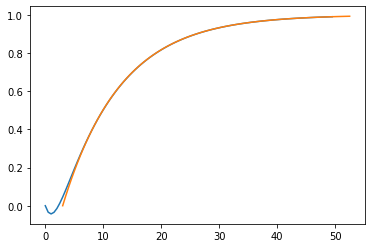

In [6]:
# Example 3.2, p. 52
# Python and MATLAB codes
td=3                        # td=3;
P1=tf([-td/2, 1],[td/2, 1]) # P1=tf([-td/2 1],[td/2 1]); % First-order Padé approximation
t=np.arange(0, 50, 0.5)     # t=0:0.5:50;
taup=10                     # taup=10;
G1=tf(1,[taup, 1])          # G1=tf(1,[taup 1]);
y1=step(G1*P1,t)[0]         # y1=step(G1*P1,t); % y1 is first order with Padé approximation of
                            #                   % dead time
y2=step(G1,t)[0]            # y2=step(G1,t);
t2=t+td                     # t2=t+td; % Shift the time axis for the actual time-delay
                            #          % function
plt.plot(t, y1, t2, y2)      # plot(t,y1,'--',t2,y2);

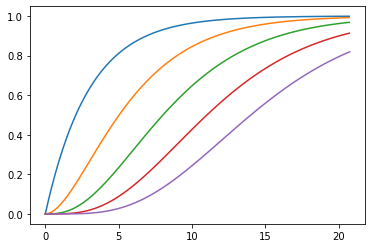

In [7]:
# Example 3.3, p. 55
# Python and MATLAB codes
tau=3                                 # tau=3; % Just an arbitrary time constant
G=tf(1,[tau, 1])                      # G=tf(1,[tau 1]);
step_resp = step(G)                   # step(G); % First-order function unit-step response
                                      # hold
plt.plot(step_resp[1], step_resp[0]) 
step_resp = step(G*G)                 # step(G*G); % Second-order response
plt.plot(step_resp[1], step_resp[0]) 
step_resp = step(G*G*G)               # step(G*G*G); % Third-order response
plt.plot(step_resp[1], step_resp[0]) 
step_resp = step(G*G*G*G)             # step(G*G*G*G); % Fourth-order response
plt.plot(step_resp[1], step_resp[0]) 
step_resp = step(G*G*G*G*G)           # step(G*G*G*G*G); % Fifth-order response
plt.plot(step_resp[1], step_resp[0]) 

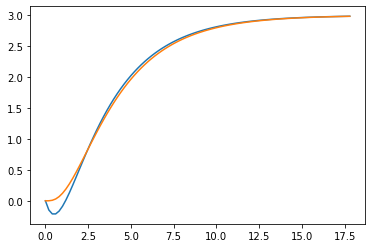

In [11]:
# Example 3.4, p. 56
# Python and MATLAB codes
p2=np.polymul([1, 1],[3, 1])                     # p2=conv([1 1],[3 1]);
p4=np.polymul(np.polymul(p2,[0.5, 1]), [0.1, 1]) # p4=conv(conv(p2,[0.5 1]) , [0.1 1]);
G4=tf(3,p4)                                      # G4=tf(3,p4); % The original full-order function
t=np.arange(0, 18, 0.2)                          # t=0:0.2:18;
y4=step(G4,t)[0]                                 # y4=step(G4,t); % Unit-step response
td=1+0.1+0.5                                     # td=1+0.1+0.5; % Approximate dead time
P1=tf([-td/2, 1],[td/2, 1])                      # P1=tf([-td/2 1],[td/2 1]);
G1=tf(3,[3, 1])                                  # G1=tf(3,[3 1]);
y1=step(P1*G1,t)[0]                              # y1=step(P1*G1,t);
plt.plot(t, y1, t, y4)                           # plot(t,y1,t,y4)

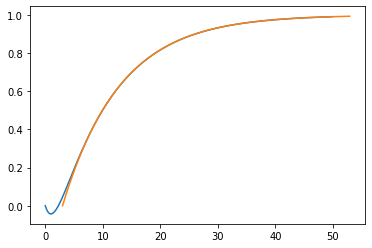

In [13]:
# Hint (9), p. 62
# Python and MATLAB codes
td=3                        # td=3; % Use an M-file to rerun with different
                            #       % values
P1=tf([-td/2, 1],[td/2, 1]) # P1=tf([-td/2 1],[td/2 1]);
step_resp=step(P1)          # step(P1); % Note how the response starts from
                            #           % negative values
t=np.arange(0, 50, 0.1)     # t=0:0.1:50;
taup=10                     # taup=10;
G1=tf(1,[taup, 1])          # G1=tf(1,[taup 1]);
y1=step(G1*P1,t)[0]         # y1=step(G1*P1,t); % y1 is first order with Padé approx of
                            #                   % dead time
y2=step(G1,t)[0]            # y2=step(G1,t); % y2 has no time delay
t2=t+td                     # t2=t+td;
plt.plot(t, y1, t2, y2)     # plot(t,y1, t2,y2,'-.');
                            # % Note how the Padé approx has a dip at the beginning

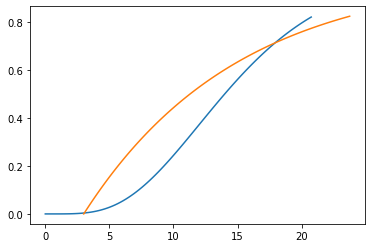

In [16]:
# Hint (10), p. 62
# Python and MATLAB codes
tau=3 # tau=3;
G=tf(1,[tau, 1]) # G=tf(1,[tau 1]);
y5,t=step(G*G*G*G*G) # [y5,t]=step(G*G*G*G*G); % The fifth-order calculation
G1=tf(1,[12, 1]) # G1=tf(1,[12 1]);
y1=step(G1,t)[0] # y1=step(G1,t); % Using a time shift to do the
t1=t+3 # t1=t+3; % first-order with dead-time plot
plt.plot(t, y5, t1, y1) # plot(t,y5, t1,y1)

[-10.          -2.          -1.          -0.33333333]


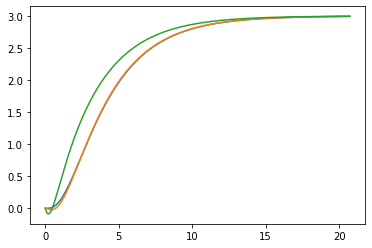

In [4]:
# Hint (11), p. 62
# Python and MATLAB codes
q=3                                              # q=3;
p2=np.polymul([1, 1],[3, 1])                     # p2=conv([1 1],[3 1]); % Second-order reduced model
p4=np.polymul(np.polymul(p2,[0.5, 1]), [0.1, 1]) # p4=conv(conv(p2,[0.5 1]),[0.1 1]);
print(np.roots(p4))                              # roots(p4) % check
G2=tf(q,p2)                                      # G2=tf(q,p2);
G4=tf(q,p4)                                      # G4=tf(q,p4);
step_resp=step(G4)                               # step(G4)
plt.plot(step_resp[1], step_resp[0])             # hold
td=0.1+0.5                                       # td=0.1+0.5;
P1=tf([-td/2, 1],[td/2, 1])                      # P1=tf([-td/2 1],[td/2 1]);
step_resp=step(P1*G2)                            # step(P1*G2); % Not bad!
plt.plot(step_resp[1], step_resp[0])
td=1+0.1+0.5                                     # td=1+0.1+0.5;
G1=tf(q,[3, 1])                                  # G1=tf(q,[3 1]); % First-order approximation
step_resp=step(P1*G1)                            # step(P1*G1); % is not that good in this case
plt.plot(step_resp[1], step_resp[0])
                                                 # hold off

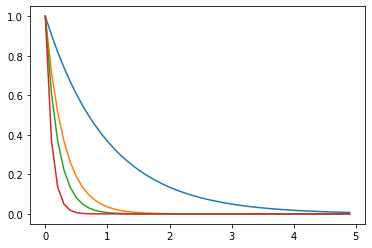

In [9]:
# Hint (12), p. 63
# Python and MATLAB codes
tau=1                   # tau=1;
t=np.arange(0, 5, 0.1)  # t=0:0.1:5;
f=np.exp(-t/tau)        # f=exp(-t/tau);
plt.plot(t, f)          # plot(t,f)
                        # hold
                        # % Now add curves with smaller time constants
frac=0.3                # frac=0.3;
f=np.exp(-t/(frac*tau)) # f=exp(-t/(frac*tau));
plt.plot(t, f)          # plot(t,f)
frac=0.2                # frac=0.2;
f=np.exp(-t/(frac*tau)) # f=exp(-t/(frac*tau));
plt.plot(t, f)          # plot(t,f)
frac=0.1                # frac=0.1;
f=np.exp(-t/(frac*tau)) # f=exp(-t/(frac*tau));
plt.plot(t, f)          # plot(t,f)

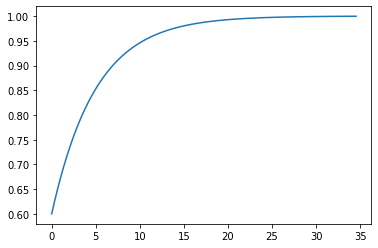

In [19]:
# Hint (13), p. 63
# Python and MATLAB codes
tz=3                                  # tz=3; % Try to vary tz, zero is -1/tz
G=tf([tz, 1],[5, 1])                  # G=tf([tz 1],[5 1]);
step_resp=step(G)                     # step(G);
plt.plot(step_resp[1], step_resp[0])

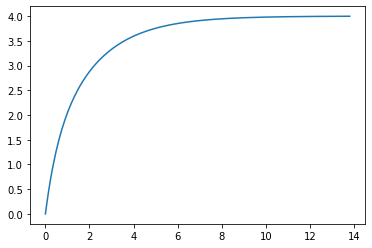

In [26]:
# Hint (13), p. 63
# Python and MATLAB codes
k1,k2=[3,1]                                      # k1=3; k2=-1;
tau1,tau2=[2,0.5]                                # tau1=2; tau2=0.5;
k=k1+k2                                          # k=k1+k2;
tz=(k1*tau2+k2*tau1)/k                           # tz=(k1*tau2+k2*tau1)/k;
G=k*tf([tz, 1], np.polymul([tau1, 1],[tau2, 1])) # G=tf(k*[tz 1], conv([tau1 1],[tau2 1]));
step_resp=step(G)                                # step(G);
plt.plot(step_resp[1], step_resp[0])